<a href="https://colab.research.google.com/github/hhemesat/MAT-421/blob/main/ModuleB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Interpolation

---



We randomly make a linear graph, making sure the x values are in ascending order

Let us find the linear interpolation at x = 8.2 based on the data x = [1, 6, 8, 9] and y = [4, 7, 6, 1] 

We first try with the equation. 

Since x is between 8 and 9, yi = 6 and yi+1 = 1. 

So 6 + ((1 - 6)(8.2 - 8))/(9 - 8.2) = 5

In [1]:
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
xlist = [1, 6, 8, 9]
ylist = [4, 7, 6, 1]
x = 8.2
f = interp1d(xlist, ylist)
y_hat = f(x)
print(y_hat)
#the extra decimals are an arithmetic mistake (reference module A)

5.0000000000000036


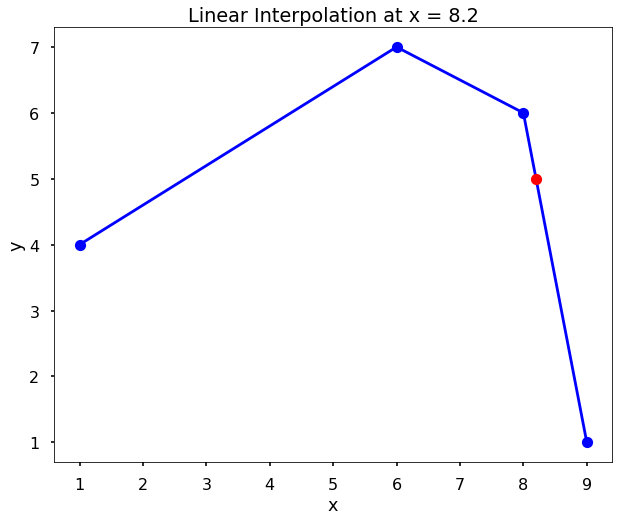

In [2]:
plt.figure(figsize = (10,8))
plt.plot(xlist, ylist, '-ob')
plt.plot(x, y_hat, 'ro')
plt.title('Linear Interpolation at x = 8.2')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

#Cubic Spline Interpolation
-----------

Now we make a cubic graph made up of piecwise cubic functions.

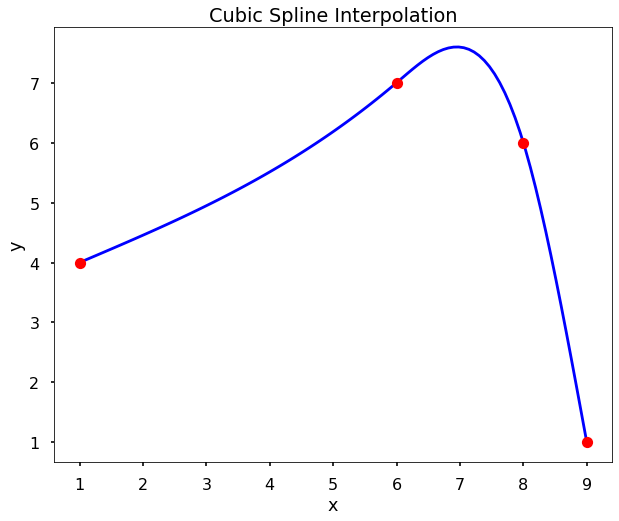

In [3]:
#making a curvilinear graph from previous example
from scipy.interpolate import CubicSpline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
f = CubicSpline(xlist, ylist, bc_type='natural')
x_new = np.linspace(1, 9, 100)
y_new = f(x_new)
plt.figure(figsize = (10,8))
plt.plot(x_new, y_new, 'b')
plt.plot(xlist, ylist, 'ro')
plt.title('Cubic Spline Interpolation')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

We find the cubic spline interpolation at x = 8.2 based on the data x = [6, 8, 9] and y = [7, 6, 1] (shortened to three points from previous example for simplicity)

Since we have 3 data points, that means we have 4(3 - 1) = 8 unknowns and 2(3 - 2) = 2 equations. 

Using the formula, we get:

In [ ]:
b = np.array([6, 8, 8, 9, 0, 0, 0, 0])
b = b[:, np.newaxis]
A = np.array([[216, 36, 6, 1, 0, 0, 0, 0], [0, 0, 0, 0, 512, 64, 8, 1], [512, 64, 8, 1, 0, 0, 0, 0], \
             [0, 0, 0, 0, 729, 81, 9, 1], [192, 16, 1, 0, -192, -16, -1, 0], [243, 2, 0, 0, -243, -2, 0, 0],\
             [36, 2, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 54, 2, 0, 0]])
np.dot(np.linalg.inv(A), b)

array([[ 1.11022302e-16],
       [-1.77635684e-15],
       [ 1.00000000e+00],
       [-4.26325641e-14],
       [ 2.22044605e-16],
       [ 3.55271368e-15],
       [ 1.00000000e+00],
       [ 1.13686838e-13]])

Then the 2 cubic polynomials are 

S1(x) = (1.11 x 10^-16)x^3 - (1.78 x 10^-15)x^2 + x - (4.26 x 10^-14) 

and

S2(x) = (2.22 x 10^-16)x^3 + (2.55 x 10^-15)x^2 +x + (1.14 x 10^13)